In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("incl/")

import ELPH_dyn
import ELPH_utils
import ELPH_Scaler
import ELPH_Optimizer

from ELPH_NVAR import SVDNVAR

In [2]:
runs = ELPH_utils.load_runs(filename='../runs_rand_inits.npz')

# runs = runs[::5]
# for k in range(len(runs)):
#     runs[k] = runs[k][:,::2]

n_runs = len(runs)
n_kmax = runs[0].shape[0]

print(n_runs, 'loaded with n_kmax =', n_kmax)

500 loaded with n_kmax = 80


runs[0] shape:  (80, 400)


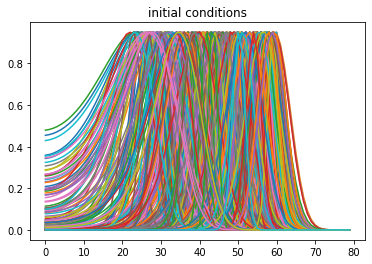

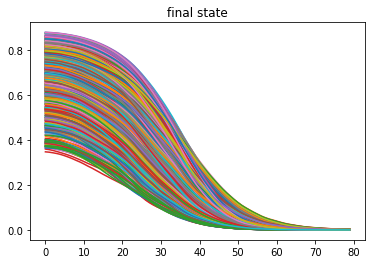

In [3]:
print('runs[0] shape: ', runs[0].shape)

for k in range(n_runs):
    plt.plot(runs[k][:,0])

plt.title('initial conditions')
plt.show()


for k in range(n_runs):
    plt.plot(runs[k][:,-1])

plt.title('final state')
plt.show()

rdim:  20
n_VAR_steps:  2
NVAR_p:  2
VAR state shape:  (40, 199101)
NVAR state shape:  (861, 199101)
target shape:  (30, 199101)
weights shape:  (861, 30)
NVAR error:  0.007663883709306485
NVAR error compared to SVD approximated run:  0.004195673083855378


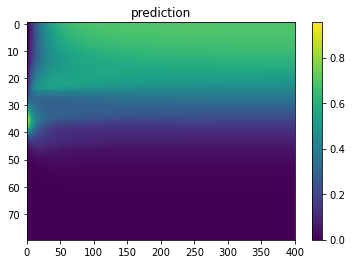

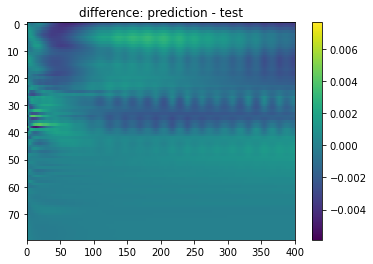

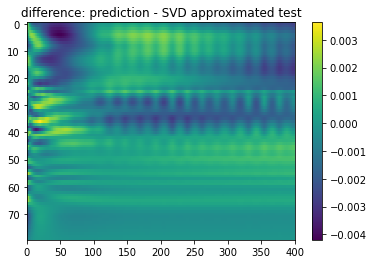

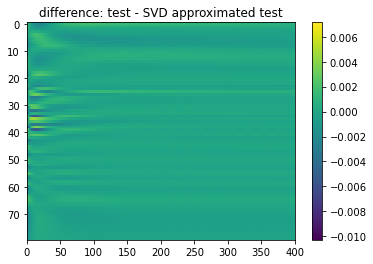

In [56]:
NVAR = SVDNVAR(runs)

optimizer = ELPH_Optimizer.ridge(alpha=10.**-3.43)
scaler = ELPH_Scaler.normalize_scaler(0.63)


train_runs = runs[::1]
test_run = train_runs.pop(332)

NVAR.load_runs(train_runs)
NVAR.train(rdim=20, prdim=30, n_VAR_steps=2, NVAR_p=2, intercept=True, optimizer=optimizer, scaler=scaler, full_hist=False)

NVAR.print_status()


print('NVAR error: ', NVAR.get_error(test_run, norm='max') )
print('NVAR error compared to SVD approximated run: ', NVAR.get_error(test_run, norm='max', errSVD=True) )

pred = NVAR.predict_single_run(test_run)
test_run_SVDapprx = NVAR.U_rdim @ NVAR.U_rdim.T @ test_run


xmax = runs[0].shape[1]

plt.imshow(pred, aspect='auto', interpolation='none')
plt.colorbar()
plt.title('prediction')
plt.xlim(0,xmax)
plt.show()

plt.imshow(pred-test_run, aspect='auto', interpolation='none')
plt.colorbar()
plt.title('difference: prediction - test')
plt.xlim(0,xmax)
plt.show()

plt.imshow(pred-test_run_SVDapprx, aspect='auto', interpolation='none')
plt.colorbar()
plt.title('difference: prediction - SVD approximated test')
plt.xlim(0,xmax)
plt.show()

plt.imshow(test_run-test_run_SVDapprx, aspect='auto', interpolation='none')
plt.colorbar()
plt.title('difference: test - SVD approximated test')
plt.xlim(0,xmax)
plt.show()

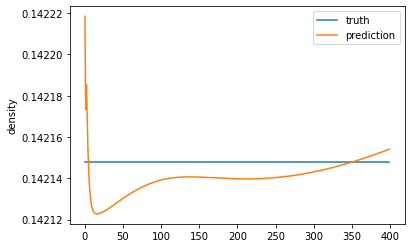

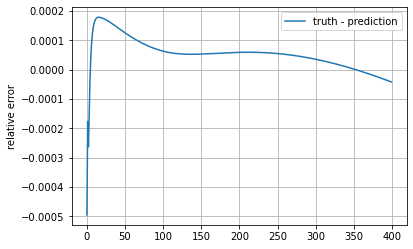

In [57]:
N_test_noPI = ELPH_dyn.get_density(test_run, 4./80.)
N_pred_noPI = ELPH_dyn.get_density(pred, 4./80.)

plt.plot(N_test_noPI, label='truth')
plt.plot(N_pred_noPI, label='prediction')
plt.legend()
plt.ylabel('density')
plt.show()

plt.grid()
plt.plot((N_test_noPI-N_pred_noPI)/N_test_noPI, label='truth - prediction')
plt.legend()
plt.ylabel('relative error')
plt.show()

ridge regression loss: 28.443413
epoch: 1 loss: 28.473919
epoch: 2 loss: 28.474909
epoch: 3 loss: 28.466324
epoch: 4 loss: 28.443453
epoch: 5 loss: 28.461807
epoch: 6 loss: 28.460747
epoch: 7 loss: 28.444874
epoch: 8 loss: 28.448051
epoch: 9 loss: 28.45695
epoch: 10 loss: 28.450638
epoch: 11 loss: 28.443102
epoch: 12 loss: 28.447388
epoch: 13 loss: 28.451912
epoch: 14 loss: 28.447258
epoch: 15 loss: 28.442879
epoch: 16 loss: 28.44589
epoch: 17 loss: 28.448654
epoch: 18 loss: 28.445492
epoch: 19 loss: 28.442652
epoch: 20 loss: 28.444717
epoch: 21 loss: 28.446508
epoch: 22 loss: 28.444317
epoch: 23 loss: 28.442516
epoch: 24 loss: 28.444016
epoch: 25 loss: 28.445034
epoch: 26 loss: 28.443361
epoch: 27 loss: 28.442326
epoch: 28 loss: 28.4435
epoch: 29 loss: 28.443958
epoch: 30 loss: 28.442682
epoch: 31 loss: 28.442257
epoch: 32 loss: 28.443153
epoch: 33 loss: 28.44311
epoch: 34 loss: 28.442154
epoch: 35 loss: 28.442179
epoch: 36 loss: 28.442768
epoch: 37 loss: 28.442427
epoch: 38 loss: 28.

epoch: 310 loss: 28.42479
epoch: 311 loss: 28.424713
epoch: 312 loss: 28.424639
epoch: 313 loss: 28.424566
epoch: 314 loss: 28.424494
epoch: 315 loss: 28.424417
epoch: 316 loss: 28.424343
epoch: 317 loss: 28.42427
epoch: 318 loss: 28.424196
epoch: 319 loss: 28.424126
epoch: 320 loss: 28.424047
epoch: 321 loss: 28.423975
epoch: 322 loss: 28.423897
epoch: 323 loss: 28.423824
epoch: 324 loss: 28.423752
epoch: 325 loss: 28.423676
epoch: 326 loss: 28.423595
epoch: 327 loss: 28.423523
epoch: 328 loss: 28.423447
epoch: 329 loss: 28.423374
epoch: 330 loss: 28.423302
epoch: 331 loss: 28.423227
epoch: 332 loss: 28.423153
epoch: 333 loss: 28.423075
epoch: 334 loss: 28.423004
epoch: 335 loss: 28.422928
epoch: 336 loss: 28.422855
epoch: 337 loss: 28.422775
epoch: 338 loss: 28.4227
epoch: 339 loss: 28.422623
epoch: 340 loss: 28.422552
epoch: 341 loss: 28.422478
epoch: 342 loss: 28.4224
epoch: 343 loss: 28.422325
epoch: 344 loss: 28.422249
epoch: 345 loss: 28.422176
epoch: 346 loss: 28.422096
epoch: 

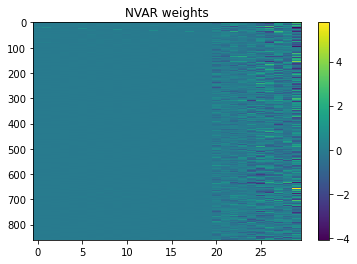

In [58]:
scaler = ELPH_Scaler.normalize_scaler(0.63)

optimizer = ELPH_Optimizer.PIML_adam(alpha=10.**-3.43, lambda1=1, epochs = 500, mini_batch_size = 100000)

train_runs = runs[::1]
test_run = train_runs.pop(332)

NVAR.load_runs(train_runs)
NVAR.train(rdim=20, prdim=30, n_VAR_steps=2, NVAR_p=2, intercept=True, optimizer=optimizer, scaler=scaler, full_hist=False)

NVAR.print_status()

plt.imshow(NVAR.w, aspect='auto', interpolation='none')
plt.colorbar()
plt.title('NVAR weights')
plt.show()

NVAR error:  0.007663883709306485


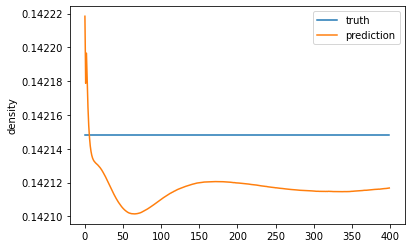

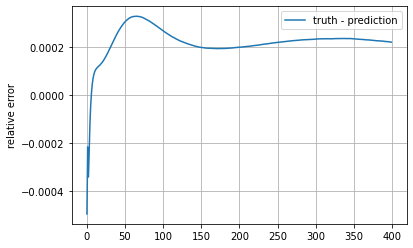

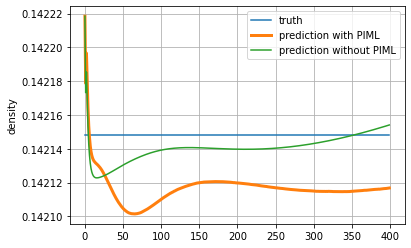

In [59]:
print('NVAR error: ', NVAR.get_error(test_run, norm='max') )


pred_PIML = NVAR.predict_single_run(test_run)


N_test = ELPH_dyn.get_density(test_run, 4./80.)
N_pred = ELPH_dyn.get_density(pred_PIML, 4./80.)

plt.plot(N_test, label='truth')
plt.plot(N_pred, label='prediction')
plt.legend()
plt.ylabel('density')
plt.show()

plt.grid()
plt.plot((N_test-N_pred)/N_test, label='truth - prediction')
plt.legend()
plt.ylabel('relative error')
plt.show()


plt.grid()
plt.plot(N_test, label='truth')
plt.plot(N_pred, label='prediction with PIML', lw=3)
plt.plot(N_pred_noPI, label='prediction without PIML')
plt.legend()
plt.ylabel('density')
plt.show()
